## Misuse/Signature Detection

### Introduction
Globally, Security of computers and the networks that connect them is increasingly becoming of great
significance. Attacks on the nation’s computer infrastructures are becoming an increasingly serious problem.
Computer security is defined as the protection of computing systems against threats to confidentiality, integrity,
and availability. A signature detection system identifies patterns of traffic or application data presumed to be
malicious

### Objective
Analyze the data set, investigate and
evaluate the result and predict the overall performance.

### Tasks in this assignment
1) Write a Data Science Proposal for achieving the objective mentioned.  
2) Perform exploratory analysis on the data and describe your understanding of the data.  
3) Perform data wrangling / pre-processing (Module 8). (missing data, normalization, discretization, etc)  
4) Apply any two feature selection engineering techniques (Module 8)  
5) Compare the two selected feature engineering techniques.  
6) Plot top 5, 6, and 8 features.  
7) Provide a high-level description of Machine Learning models – SVM and Decision tree to predict.  
8) Compare the performance of the two classifiers – SVM and Decision tree to predict.  
9) Present the conclusions/results in the format shared.  
10) Any suggestion on the identification of the performance parameters to be improved, for the given classification problem.  

#### Notebook Initialization

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import scipy as scipy
import matplotlib as matplot
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from scipy.stats import pearsonr

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.precision", 4)
np.random.seed(2021)

#### NOTE:
This notebook uses the below mentioned versions of the following libraries.  
So please have your libraries updated in order to execute this notebook.`

In [2]:
print("numpy:", np.__version__)
print("pandas:", np.__version__)
print("seaborn:", sns.__version__)
print("sklearn:", sk.__version__)
print("matplotlib:", matplot.__version__)
print("scipy:", scipy.__version__)

numpy: 1.19.5
pandas: 1.19.5
seaborn: 0.11.1
sklearn: 0.24.0
matplotlib: 3.3.3
scipy: 1.6.0


#### Read the dataset

In [3]:
signature_original_dataframe = pd.read_csv("signature-dataset.csv")
df = signature_original_dataframe.copy()

#### Feature Description
<b>TO BE ADDED</b>


### Exploratory Data Analysis

In [4]:
print("df.shape:", df.shape)
# the dataset has 40 attributes and 22544 records
print()
print(df.info())

df.shape: (22544, 40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64 

#### OBSERVATIONS:
- total number of records in the given dataset is 22544.
- protocol_type, service and flag attributes are of nominal type  
- <b>class</b> attribute is the target attribute    
- <b>count</b> and <b>srv_count</b> attributes have missing values
- some of the numerical attributes are of int type and rest of them are of float type

#### Lets count the number of missing data points across the various attributes 

In [5]:
df.isnull().sum().sort_values(ascending = False)

count                          18
srv_count                      13
dst_host_srv_rerror_rate        0
dst_host_rerror_rate            0
serror_rate                     0
srv_serror_rate                 0
rerror_rate                     0
srv_rerror_rate                 0
same_srv_rate                   0
diff_srv_rate                   0
srv_diff_host_rate              0
dst_host_count                  0
protocol_type                   0
dst_host_same_srv_rate          0
dst_host_diff_srv_rate          0
dst_host_same_src_port_rate     0
dst_host_srv_diff_host_rate     0
dst_host_serror_rate            0
dst_host_srv_serror_rate        0
dst_host_srv_count              0
duration                        0
is_guest_login                  0
hot                             0
service                         0
flag                            0
src_bytes                       0
dst_bytes                       0
land                            0
wrong_fragment                  0
urgent        

#### OBSERVATIONS:
- <b>count</b> attribute has 18 missing points
- <b>srv_count</b> attribute has 13 missing points

#### Lets see the target variable carefully
In the given dataset, the target variable is a categorical attribute.

In [6]:
df['class'].value_counts(sort=True)

anomaly    12833
normal      9711
Name: class, dtype: int64

#### OBSERVATIONS:
- The target variable <b>class</b> has only two unique values: <b>anomaly</b> and <b>normal</b>  
- Target variable is a symmetric categorical attribute.

#### Approach for handling the missing values for numerical attributes
Since the target label has no missing data, so we can find out the mean of the numerical attributes corresponding to each class, and then can replace the missing data with that mean value altogether.

Since we have two features (count and srv_count) which has missing values, so lets analyze them first.

In [7]:
def replace_with_mean_per_class(attr):
    attr_mean_per_class = df.loc[:, [attr, 'class']].groupby(by=['class']).mean()
    attr_and_class = df.loc[:, [attr, 'class']]
    attr_and_class[attr] = np.where(attr_and_class['class'] == 'anomaly', 
                                attr_and_class[attr].fillna(attr_mean_per_class.loc['anomaly', attr]),
                                attr_and_class[attr].fillna(attr_mean_per_class.loc['normal', attr]))
    df[attr] = attr_and_class[attr]

In [8]:
print("Describing count attribute:")
print(df['count'].describe())
print()
print("Describing srv_count attribute:")
print(df['srv_count'].describe())

Describing count attribute:
count    22526.0000
mean        79.0168
std        128.5458
min          0.0000
25%          1.0000
50%          8.0000
75%        123.0000
max        511.0000
Name: count, dtype: float64

Describing srv_count attribute:
count    22531.0000
mean        31.1075
std         89.0273
min          0.0000
25%          1.0000
50%          6.0000
75%         16.0000
max        511.0000
Name: srv_count, dtype: float64


#### OBSERVATIONS:
- The mean for 'count' and 'srv_count' with the missing values are 79.0168 and 31.1075 rescpectively.

In [9]:
_ = replace_with_mean_per_class('count')
_ = replace_with_mean_per_class('srv_count')

In [10]:
print("Describing count attribute:")
print(df['count'].describe())
print()
print("Describing srv_count attribute:")
print(df['srv_count'].describe())

Describing count attribute:
count    22544.0000
mean        79.0160
std        128.4985
min          0.0000
25%          1.0000
50%          8.0000
75%        123.0000
max        511.0000
Name: count, dtype: float64

Describing srv_count attribute:
count    22544.0000
mean        31.1086
std         89.0018
min          0.0000
25%          1.0000
50%          6.0000
75%         16.0000
max        511.0000
Name: srv_count, dtype: float64


#### OBSERVATIONS:
- The mean for 'count' and 'srv_count' with the missing values are 79.0160 and 31.1086 rescpectively.

#### Data Types Conversion
Lets convert the datatypes for each numerical attribute to the float type in order to proceed with further EDA.

In [11]:
df['duration'] = df['duration'].astype('float64')
df['src_bytes'] = df['src_bytes'].astype('float64')
df['dst_bytes'] = df['dst_bytes'].astype('float64')
df['land'] = df['land'].astype('float64')
df['wrong_fragment'] = df['wrong_fragment'].astype('float64')

df['urgent'] = df['urgent'].astype('float64')
df['hot'] = df['hot'].astype('float64')
df['num_failed_logins'] = df['num_failed_logins'].astype('float64')
df['logged_in'] = df['logged_in'].astype('float64')
df['num_compromised'] = df['num_compromised'].astype('float64')

df['root_shell'] = df['root_shell'].astype('float64')
df['su_attempted'] = df['su_attempted'].astype('float64')
df['num_root'] = df['num_root'].astype('float64')
df['num_file_creations'] = df['num_file_creations'].astype('float64')
df['num_shells'] = df['num_shells'].astype('float64')

df['num_access_files'] = df['num_access_files'].astype('float64')
df['is_guest_login'] = df['is_guest_login'].astype('float64')
df['dst_host_count'] = df['dst_host_count'].astype('float64')
df['dst_host_srv_count'] = df['dst_host_srv_count'].astype('float64')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  float64
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  float64
 5   dst_bytes                    22544 non-null  float64
 6   land                         22544 non-null  float64
 7   wrong_fragment               22544 non-null  float64
 8   urgent                       22544 non-null  float64
 9   hot                          22544 non-null  float64
 10  num_failed_logins            22544 non-null  float64
 11  logged_in                    22544 non-null  float64
 12  num_compromised              22544 non-null  float64
 13  root_shell      

#### Lets analyze each attribute
Here we check for the outliers or incompatible values for the attribute, and then address these issues.

In [12]:
numerical_features = ['duration',
                      'src_bytes',
                      'dst_bytes',
                      'land',
                      'wrong_fragment',
                      'urgent',
                      'hot',
                      'num_failed_logins',
                      'logged_in',
                      'num_compromised',
                      'root_shell',
                      'su_attempted',
                      'num_root',
                      'num_file_creations',
                      'num_shells',
                      'num_access_files',
                      'is_guest_login',
                      'count',
                      'srv_count',
                      'serror_rate',
                      'srv_serror_rate',
                      'rerror_rate',
                      'srv_rerror_rate',
                      'same_srv_rate',
                      'diff_srv_rate',
                      'srv_diff_host_rate',
                      'dst_host_count',
                      'dst_host_srv_count',
                      'dst_host_same_srv_rate',
                      'dst_host_diff_srv_rate',
                      'dst_host_same_src_port_rate',
                      'dst_host_srv_diff_host_rate',
                      'dst_host_serror_rate',
                      'dst_host_srv_serror_rate',
                      'dst_host_rerror_rate',
                      'dst_host_srv_rerror_rate']

categorical_features = ['protocol_type', 'service', 'flag']

In [13]:
numerical_features_df = df[numerical_features]
print(numerical_features_df.info())
print()
categorical_features_df = df[categorical_features]
print(categorical_features_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  float64
 1   src_bytes                    22544 non-null  float64
 2   dst_bytes                    22544 non-null  float64
 3   land                         22544 non-null  float64
 4   wrong_fragment               22544 non-null  float64
 5   urgent                       22544 non-null  float64
 6   hot                          22544 non-null  float64
 7   num_failed_logins            22544 non-null  float64
 8   logged_in                    22544 non-null  float64
 9   num_compromised              22544 non-null  float64
 10  root_shell                   22544 non-null  float64
 11  su_attempted                 22544 non-null  float64
 12  num_root                     22544 non-null  float64
 13  num_file_creatio

#### OBSERVATIONS:
- Here we have now seggregated the numerical and categorical features into two distinct dataframes.
- There are 36 numerical attributes present within the given dataset.
- There are only 3 categorical attributes present within the given dataset.

### Lets analyze the numerical attributes

In [14]:
def analyzeTheAttr(attr):
    ndf = numerical_features_df[attr]
    fig, ax = plt.subplots(1, 3, figsize=(18,6))
    _ = sns.distplot(ndf, bins=50, kde=True, ax=ax[0])
    _ = sns.boxplot(ndf, ax=ax[1])
    _ = ndf.hist(ax=ax[2])
    fig.show()

#### Attribute: duration

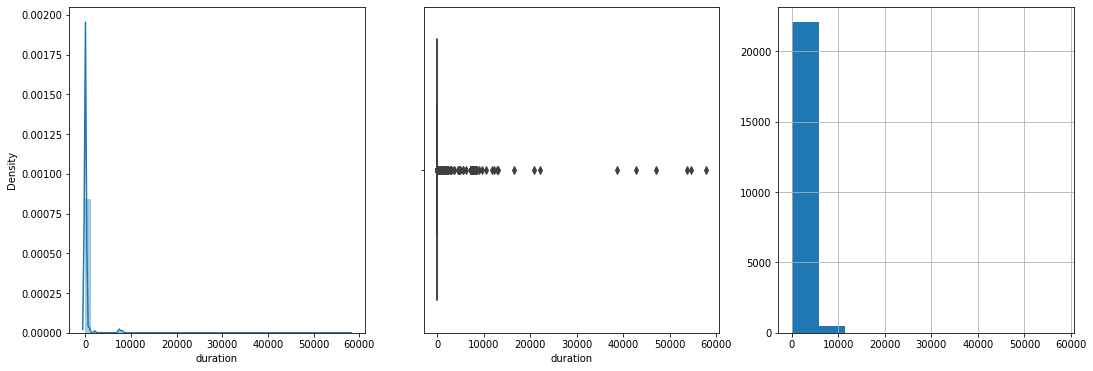

In [15]:
_ = analyzeTheAttr('duration')

#### Attribute: src_bytes

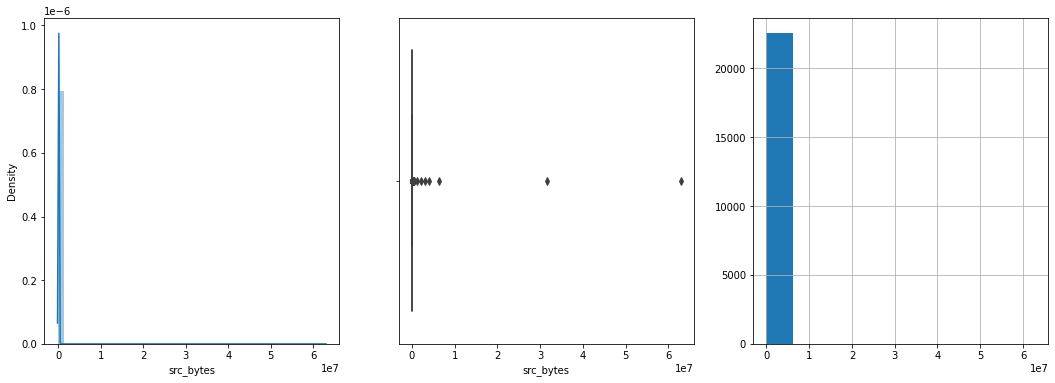

In [16]:
_ = analyzeTheAttr('src_bytes')

#### Attribute: dst_bytes

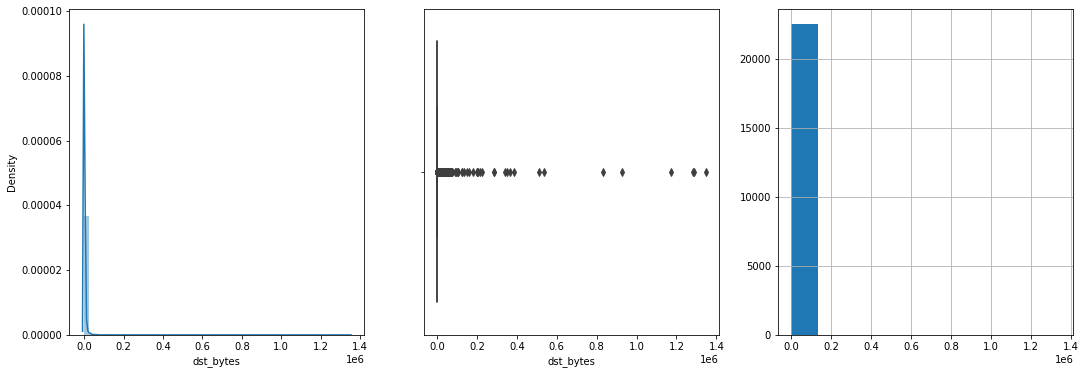

In [17]:
_ = analyzeTheAttr('dst_bytes')

#### Attribute: land

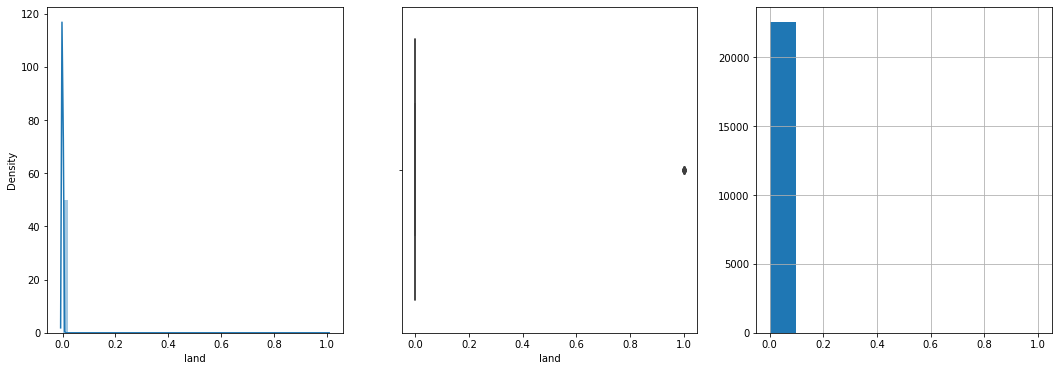

In [18]:
_ = analyzeTheAttr('land')

#### Attribute: wrong_fragment

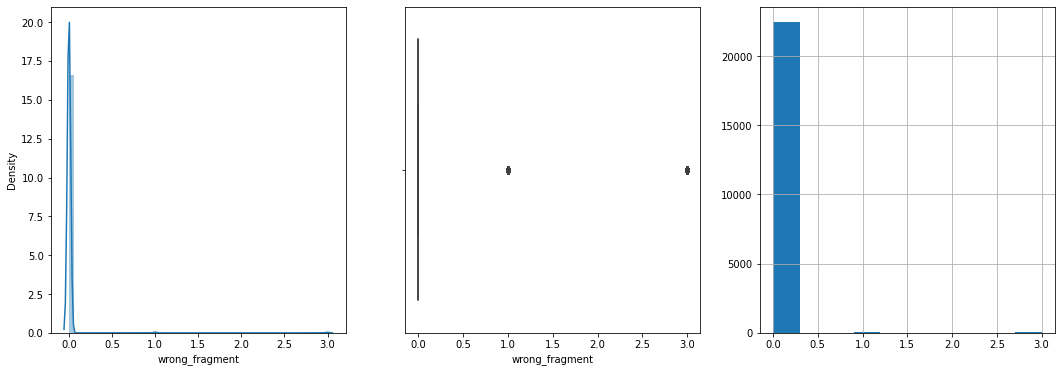

In [19]:
_ = analyzeTheAttr('wrong_fragment')

#### Attribute: urgent

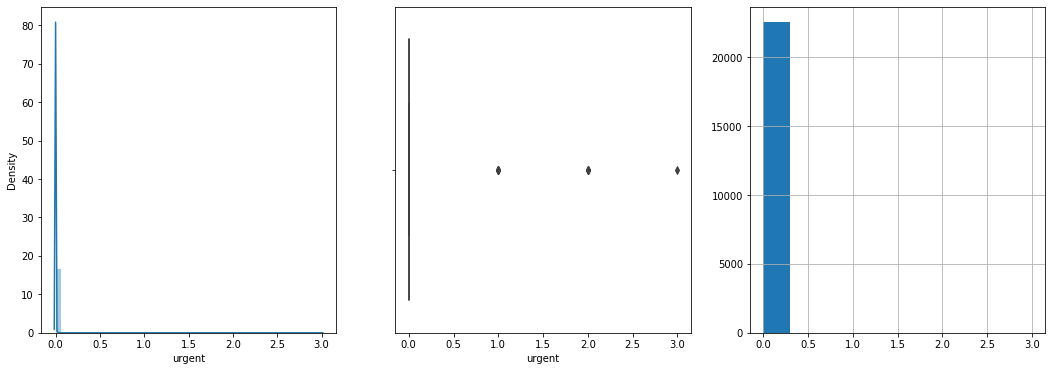

In [20]:
_ = analyzeTheAttr('urgent')

#### Attribute: hot

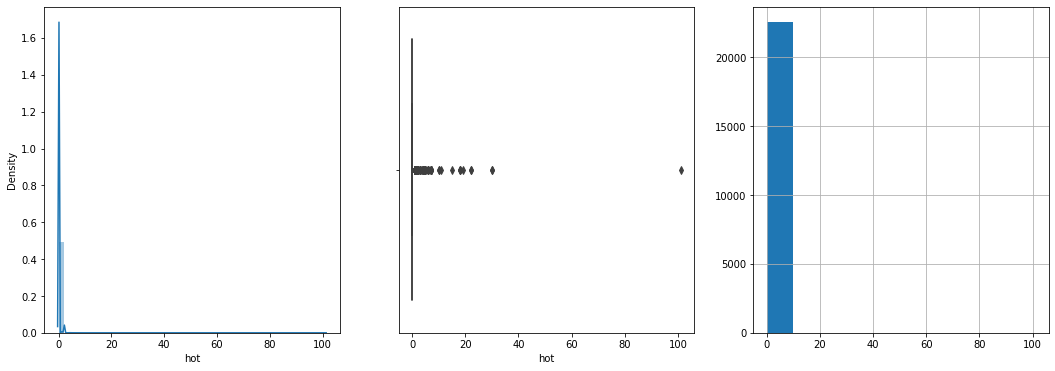

In [21]:
_ = analyzeTheAttr('hot')

#### Attribute: num_failed_logins

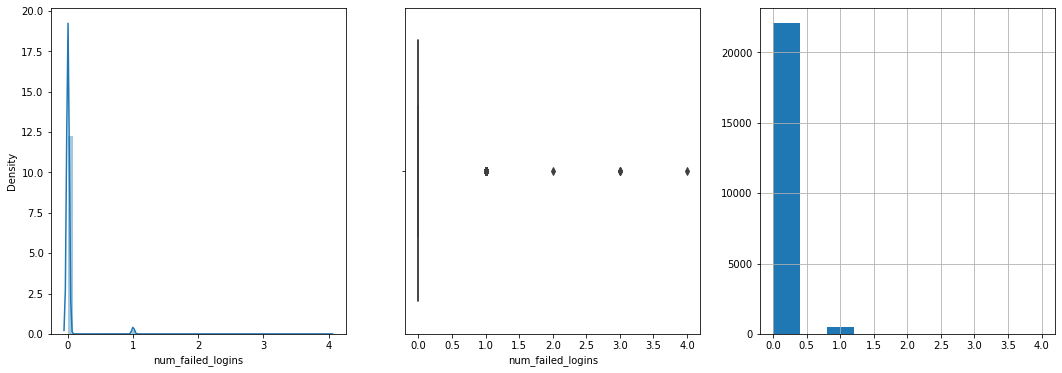

In [22]:
_ = analyzeTheAttr('num_failed_logins')

#### Attribute: logged_in

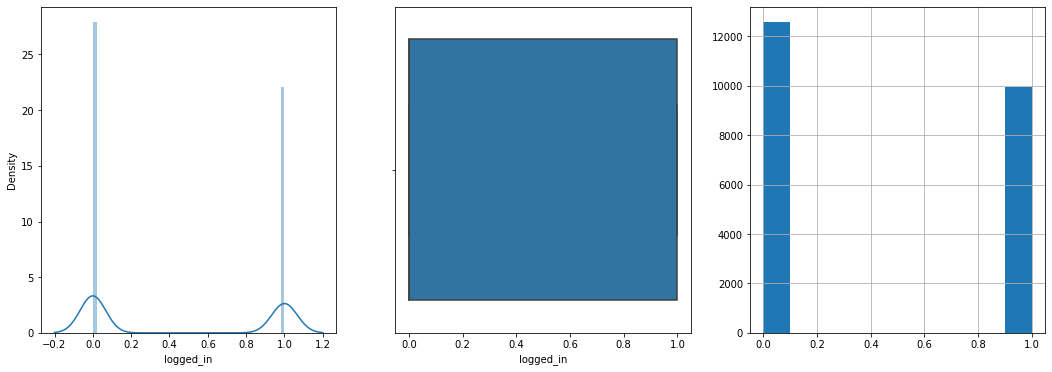

In [23]:
_ = analyzeTheAttr('logged_in')

#### Attribute: num_compromised

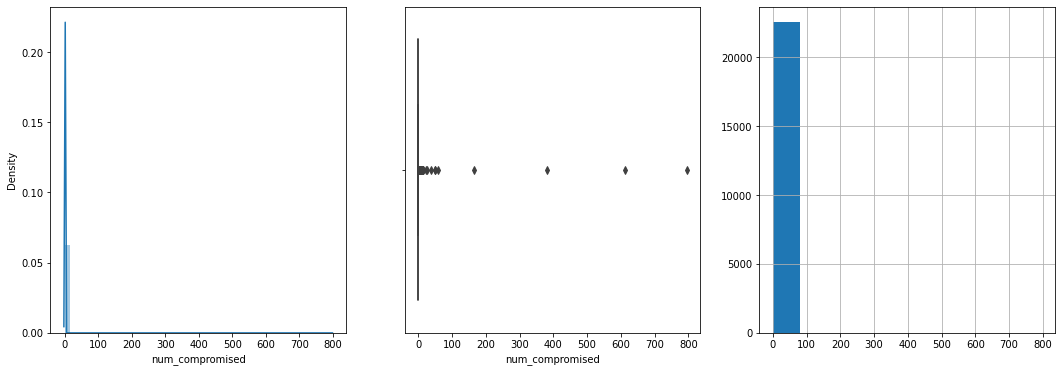

In [24]:
_ = analyzeTheAttr('num_compromised')

#### Attribute: su_attempted

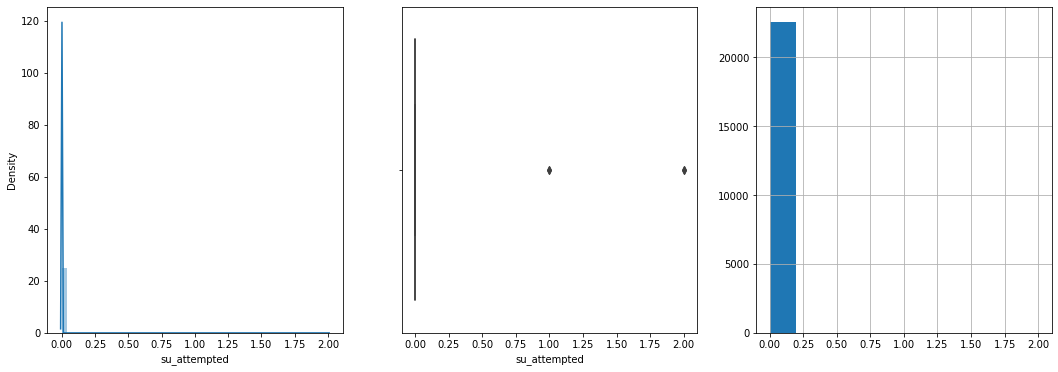

In [25]:
_ = analyzeTheAttr('su_attempted')

#### Attribute: num_root

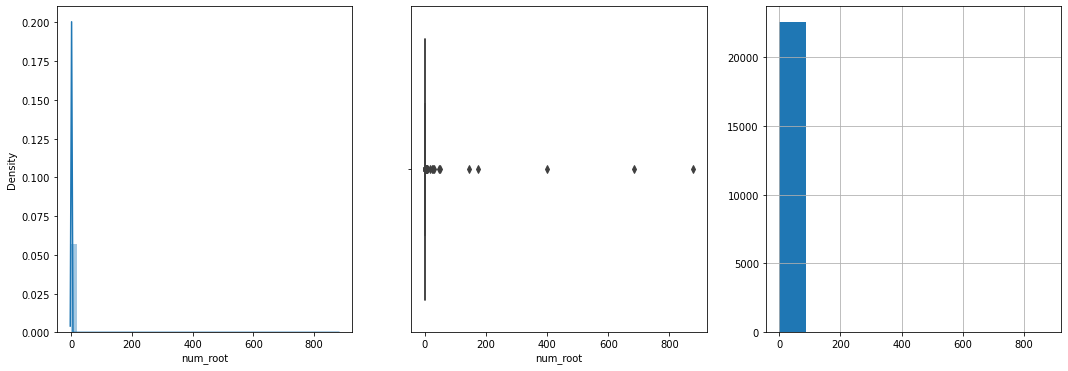

In [26]:
_ = analyzeTheAttr('num_root')

#### Attribute: num_file_creations

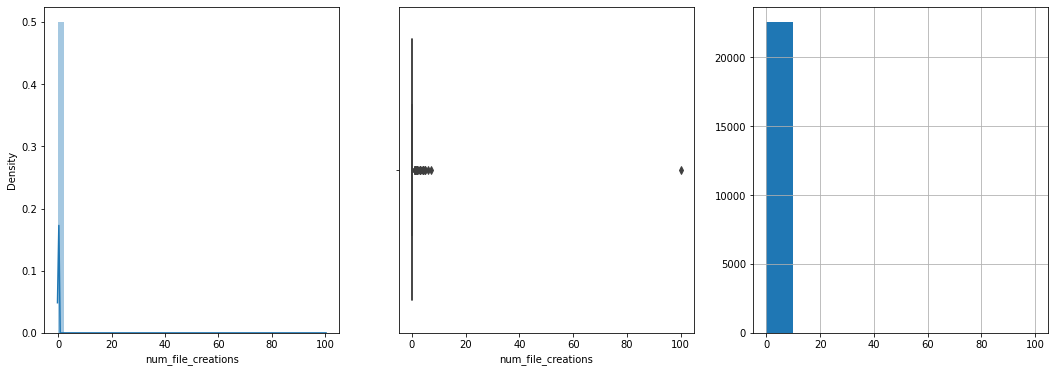

In [27]:
_ = analyzeTheAttr('num_file_creations')

#### Attribute: num_shells

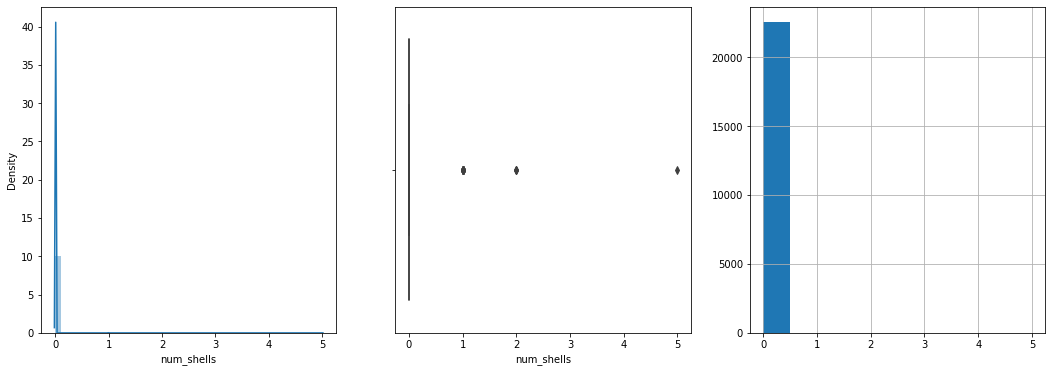

In [28]:
_ = analyzeTheAttr('num_shells')

#### Attribute: num_access_files

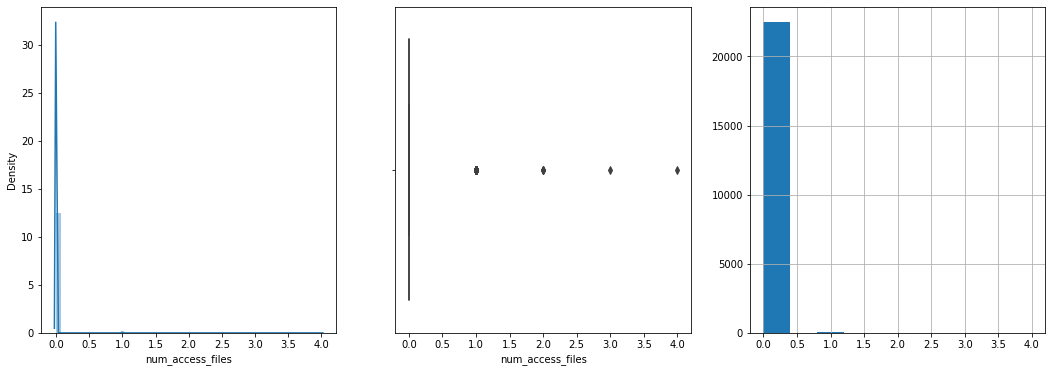

In [29]:
_ = analyzeTheAttr('num_access_files')

#### Attribute: is_guest_login

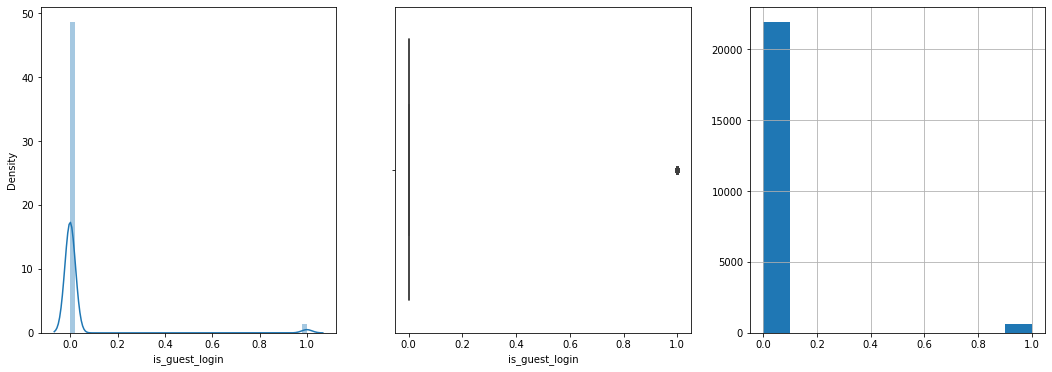

In [30]:
_ = analyzeTheAttr('is_guest_login')

#### Attribute: count

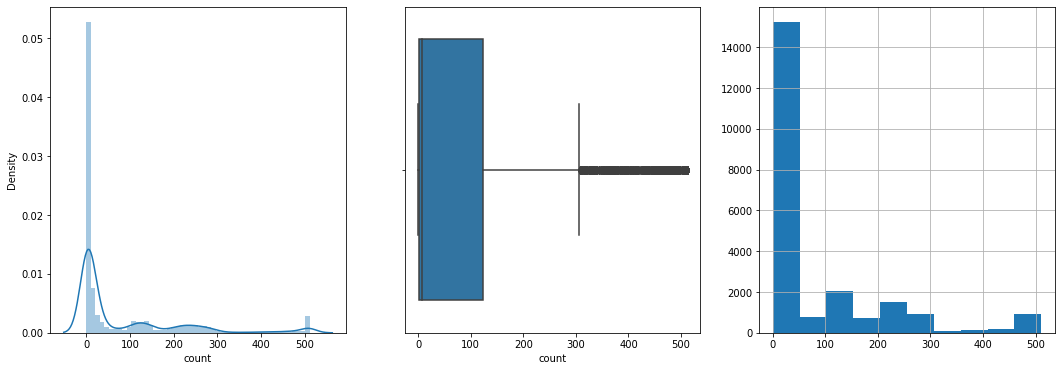

In [31]:
_ = analyzeTheAttr('count')

#### Attribute: srv_count

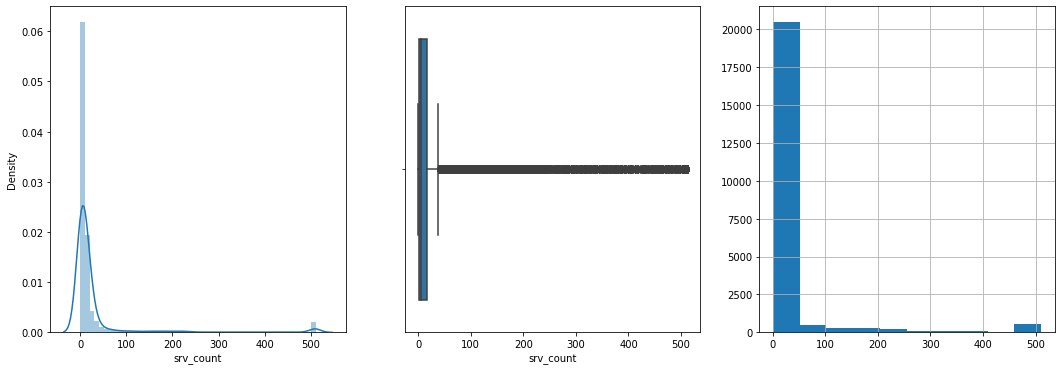

In [32]:
_ = analyzeTheAttr('srv_count')

#### Attribute: serror_rate

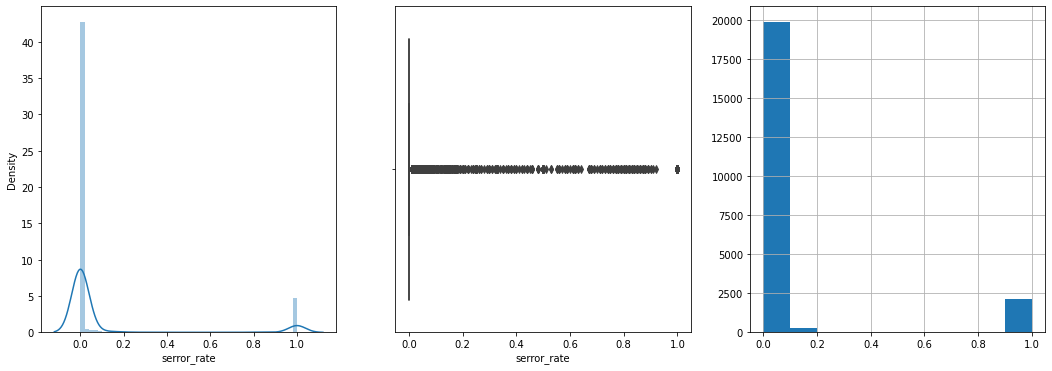

In [33]:
_ = analyzeTheAttr('serror_rate')

#### Attribute: srv_serror_rate

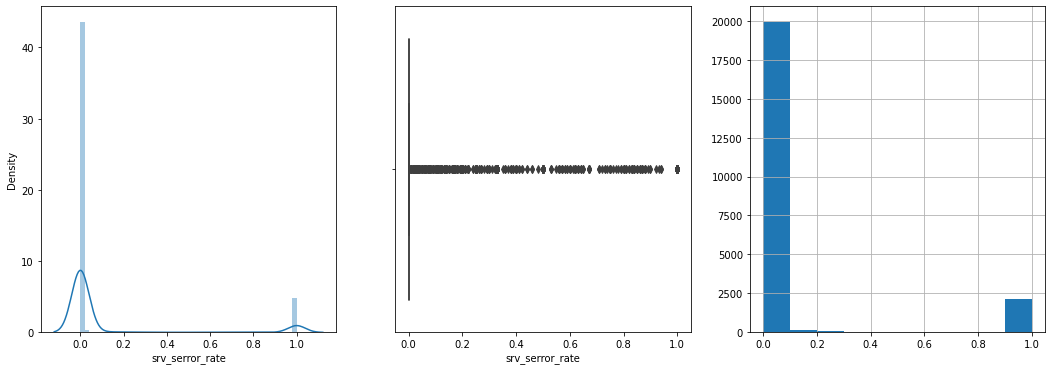

In [34]:
_ = analyzeTheAttr('srv_serror_rate')

#### Attribute: rerror_rate

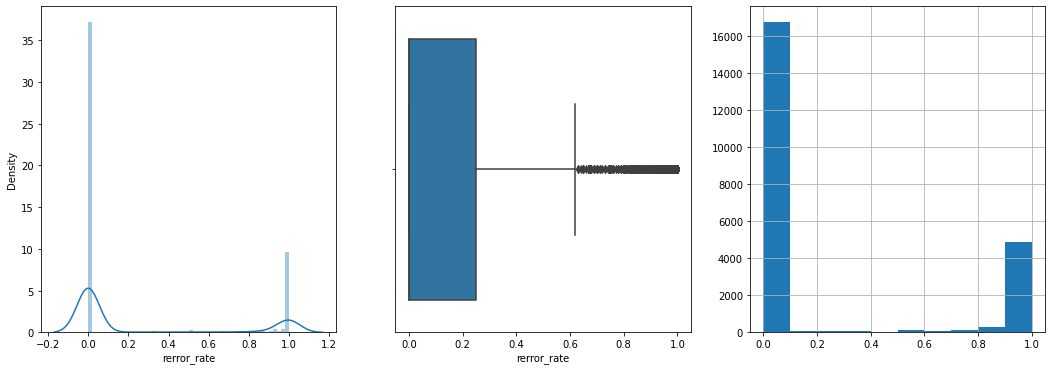

In [35]:
_ = analyzeTheAttr('rerror_rate')

#### Attribute: srv_rerror_rate

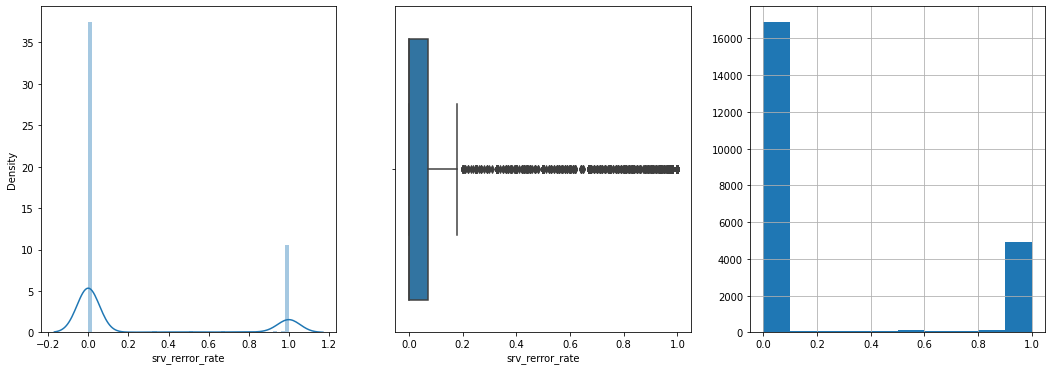

In [36]:
_ = analyzeTheAttr('srv_rerror_rate')

#### Attribute: same_srv_rate

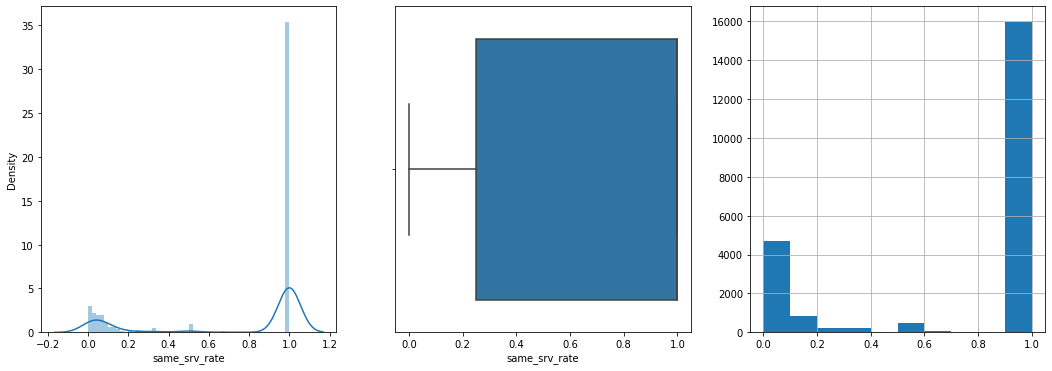

In [37]:
_ = analyzeTheAttr('same_srv_rate')

#### Attribute: diff_srv_rate

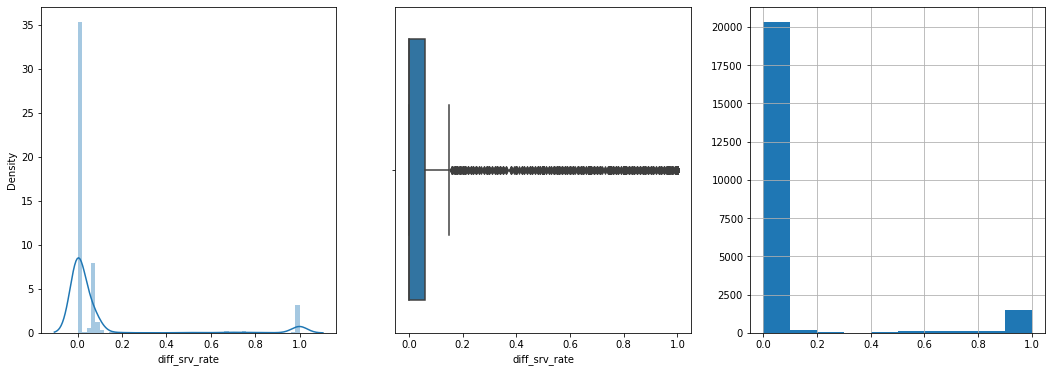

In [38]:
_ = analyzeTheAttr('diff_srv_rate')

#### Attribute: srv_diff_host_rate

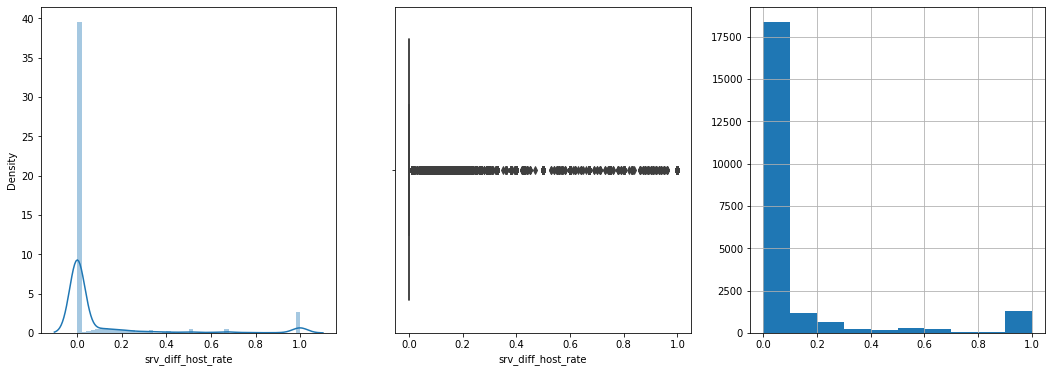

In [39]:
_ = analyzeTheAttr('srv_diff_host_rate')

#### Attribute: dst_host_count

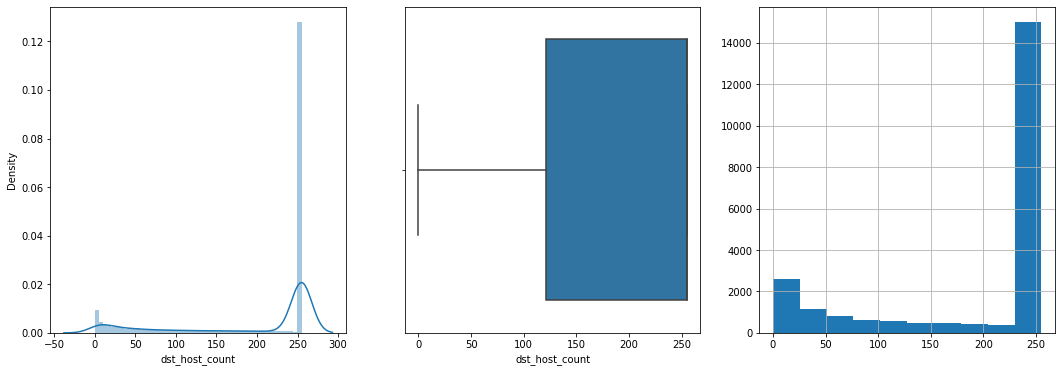

In [40]:
_ = analyzeTheAttr('dst_host_count')

#### Attribute: dst_host_srv_count

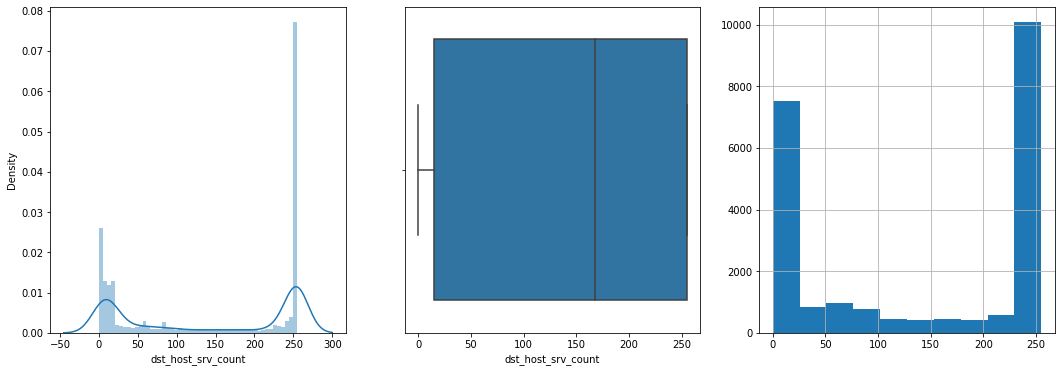

In [41]:
_ = analyzeTheAttr('dst_host_srv_count')

#### Attribute: dst_host_same_srv_rate

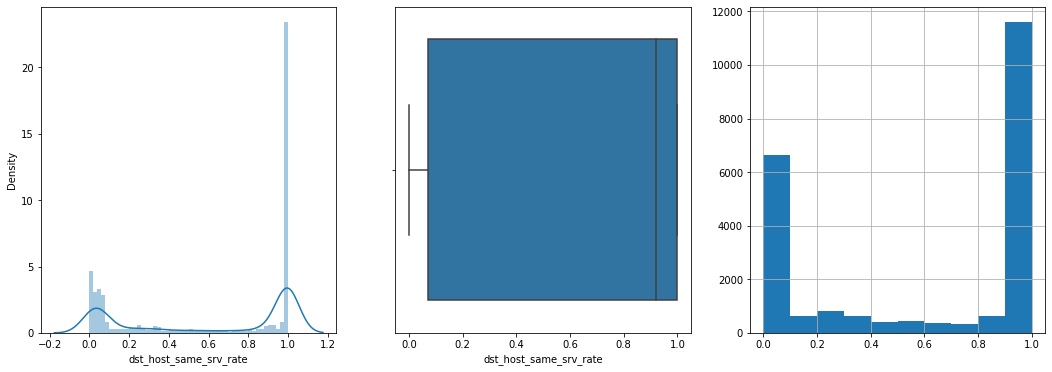

In [42]:
_ = analyzeTheAttr('dst_host_same_srv_rate')

#### Attribute: dst_host_diff_srv_rate

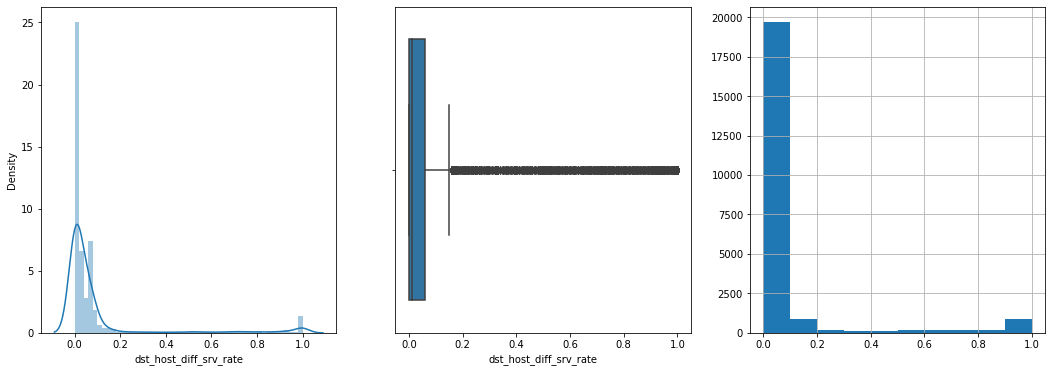

In [43]:
_ = analyzeTheAttr('dst_host_diff_srv_rate')

#### Attribute: dst_host_same_src_port_rate

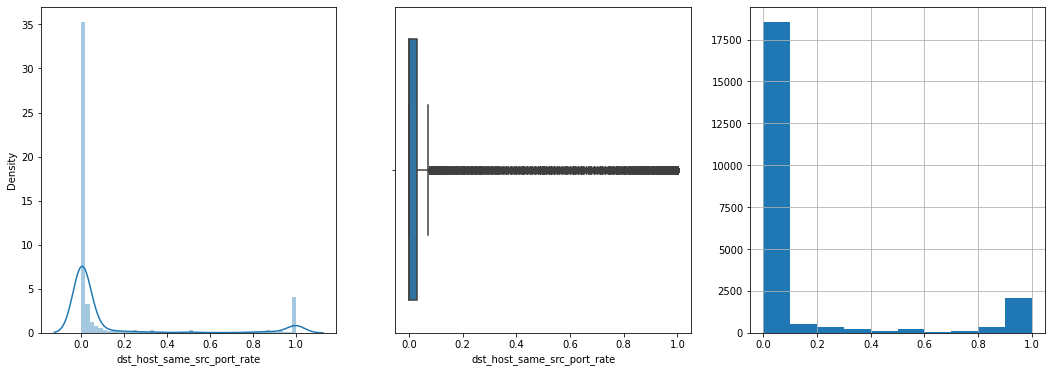

In [44]:
_ = analyzeTheAttr('dst_host_same_src_port_rate')

#### Attribute: dst_host_srv_diff_host_rate

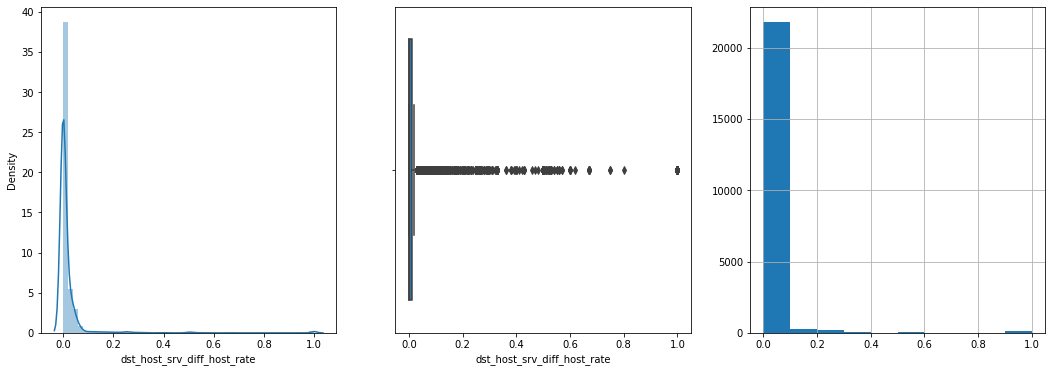

In [45]:
_ = analyzeTheAttr('dst_host_srv_diff_host_rate')

#### Attribute: dst_host_serror_rate

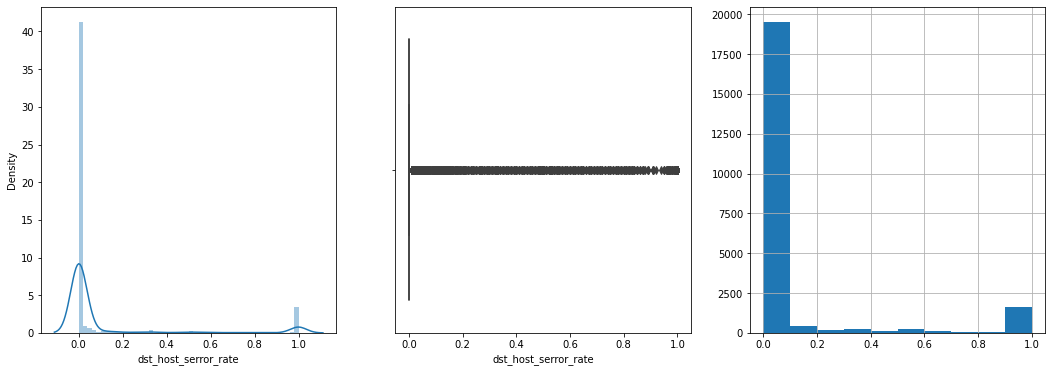

In [46]:
_ = analyzeTheAttr('dst_host_serror_rate')

#### Attribute: dst_host_srv_serror_rate

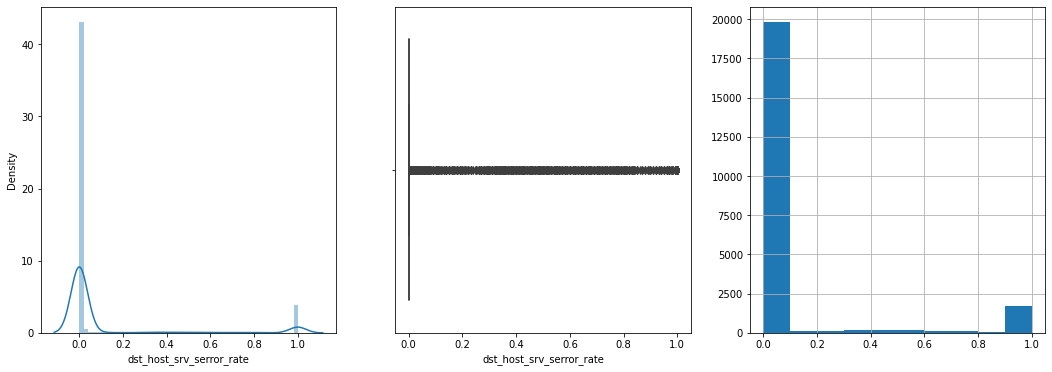

In [47]:
_ = analyzeTheAttr('dst_host_srv_serror_rate')

#### Attribute: dst_host_rerror_rate

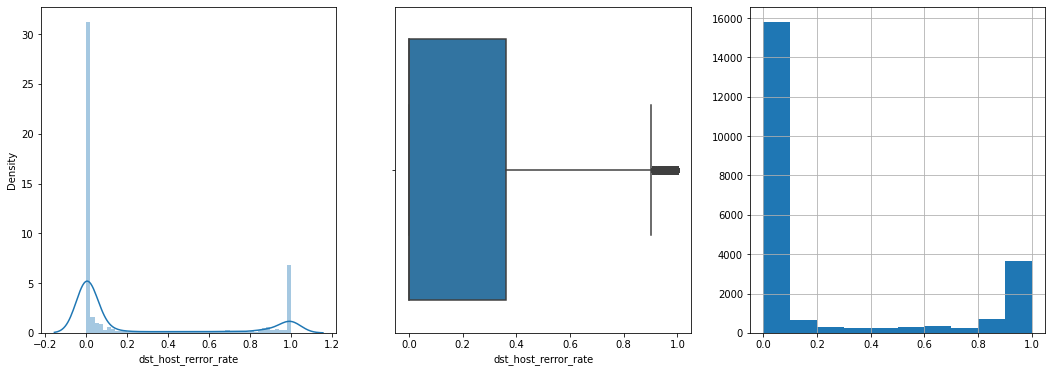

In [48]:
_ = analyzeTheAttr('dst_host_rerror_rate')

#### Attribute: dst_host_srv_rerror_rate

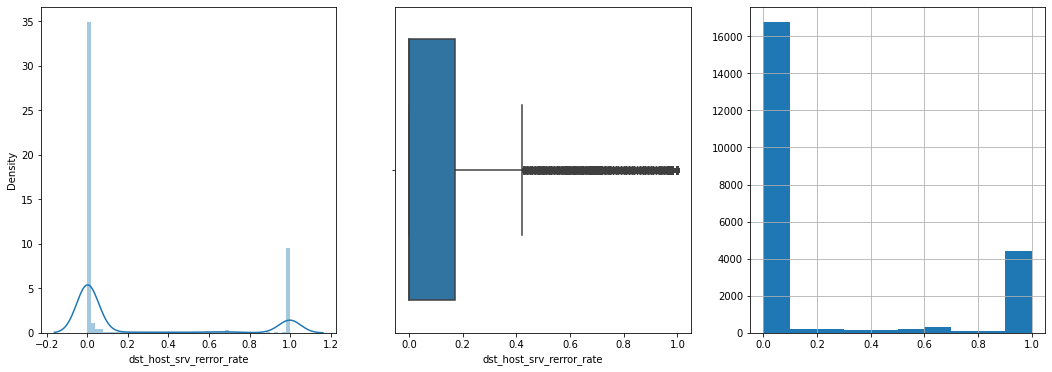

In [49]:
_ = analyzeTheAttr('dst_host_srv_rerror_rate')

In [50]:
# fig, axes = plt.subplots(nrows=18, ncols=2, figsize=(30,30))
# _ = fig.subplots_adjust(hspace=0.5)
# _ = fig.suptitle('Distributions of Numerical Features', fontsize=30)


# for ax, feats in zip(axes.flatten(), numerical_features_df):
#     _ = sns.distplot(a=df[feats], ax=ax)

#### Plot the heatmap for the numerical attributes

In [51]:
# df[numerical_features].corr()

In [52]:
# fig, ax = plt.subplots(figsize=(250,80))
# _ = sns.heatmap(df[numerical_features].corr(), annot=True, fmt='.2f', ax=ax, vmin=-1, vmax=1, center=0, cmap='coolwarm')

# plt.xticks(rotation=45)
# plt.yticks(rotation=45)
# plt.title('Correlations between different predictors', fontsize=30)
# plt.show()

#### Transform the numerical attributes

#### Analyze the categorical attributes
We have three categorical attributes: protocol_type, service and flag

In [53]:
# unique values for the protocol_type attribute
df['protocol_type'].value_counts(sort=True)

tcp     18880
udp      2621
icmp     1043
Name: protocol_type, dtype: int64

In [54]:
# unique values for the service attribute
print(df['service'].value_counts(sort=True))

print()
print("Number of unique values for the service attribute:", df['service'].value_counts(sort=True).count()) #64

http       7853
private    4774
telnet     1626
pop_3      1019
smtp        934
           ... 
printer      11
ntp_u        10
rje           8
tim_i         6
tftp_u        1
Name: service, Length: 64, dtype: int64

Number of unique values for the service attribute: 64


In [55]:
# unique values for the flag attribute
df['flag'].value_counts(sort=True)

SF        14875
REJ        3850
S0         2013
RSTO        773
RSTR        669
S3          249
SH           73
S1           21
S2           15
OTH           4
RSTOS0        2
Name: flag, dtype: int64

#### Now, at this point, we have our final dataset ready to be used with the machine learning algorithms.
We will first split the dependent and independent attributes.

In [56]:
X = df[numerical_features].iloc[:,:]
Y = df[numerical_features].iloc[:, -1]

# lets see all the independent features present in our dataset
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  float64
 1   src_bytes                    22544 non-null  float64
 2   dst_bytes                    22544 non-null  float64
 3   land                         22544 non-null  float64
 4   wrong_fragment               22544 non-null  float64
 5   urgent                       22544 non-null  float64
 6   hot                          22544 non-null  float64
 7   num_failed_logins            22544 non-null  float64
 8   logged_in                    22544 non-null  float64
 9   num_compromised              22544 non-null  float64
 10  root_shell                   22544 non-null  float64
 11  su_attempted                 22544 non-null  float64
 12  num_root                     22544 non-null  float64
 13  num_file_creatio

#### Lets Encode the target attribute

In [57]:
Y.shape

(22544,)

In [58]:
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 2021)

#### Split the dataset across training and testing datasets
1. We will keep 75% of the data for the training purpose  
2. We will keep 25% of the data for the testing purpose

### Model Building and Evaluation

#### Machine Learning: Decision Tree 

In [60]:
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(X_train, Y_train)
Y_pred = dt_classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)

dt_model_accuracy = (100 * (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1]))
print("Decision Tree Model Accuracy:", dt_model_accuracy)

dt_cv_accuracies = cross_val_score(estimator = dt_classifier, 
                                    X = X_train, 
                                    y = Y_train, 
                                    cv = 10, 
                                    scoring = 'accuracy')

dt_cv_accuracies_mean = (dt_cv_accuracies.mean() * 100)
dt_cv_accuracies_std = (dt_cv_accuracies.std() * 100)

print("Decision Tree Cross Validation Accuracy: {:.2f} %".format(dt_cv_accuracies_mean))
print("Decision Tree Cross Validation Standard-Deviation: {:.2f} %".format(dt_cv_accuracies_std))
print()
# generate_roc_curves(dt_classifier)

Decision Tree Model Accuracy: 100.0
Decision Tree Cross Validation Accuracy: 99.98 %
Decision Tree Cross Validation Standard-Deviation: 0.04 %



#### Machine Learning: Support Vector Machine

In [61]:
# from sklearn.svm import SVC

# svclassifier = SVC(kernel='linear')
# svclassifier.fit(X_train, Y_train)
# Y_pred = svclassifier.predict(X_test)

In [62]:
# from sklearn.metrics import classification_report, confusion_matrix
# print(confusion_matrix(Y_test,Y_pred))
# print(classification_report(Y_test,Y_pred))

### THE END